<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie matplotlib
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv("sous_nutrition.csv")

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
print(len(population.columns))

#La nature des données dans chacune des colonnes
print(population.dtypes)
print()

#Le nombre de valeurs présentes dans chacune des colonnes

population.count()

3
Zone       object
Année       int64
Valeur    float64
dtype: object



Zone      1416
Année     1416
Valeur    1416
dtype: int64

In [5]:
#Affichage les 5 premières lignes de la table
display(population.head())

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000

population["Valeur"] = population["Valeur"] * 1000

In [7]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={"Valeur":"Population"})

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
display(population.head())

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [10]:
#Consulter le nombre de colonnes
len(dispo_alimentaire.columns)

18

In [11]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace = True)

In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
mask = ['Aliments pour animaux', 'Disponibilité intérieure',
       'Autres Utilisations', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock']
dispo_alimentaire[mask] = dispo_alimentaire[mask] * 1000000

In [14]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [16]:
#Consulter le nombre de colonnes
len(aide_alimentaire.columns)

4

In [17]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={"Pays bénéficiaire":"Zone"})

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire["Valeur"] = aide_alimentaire["Valeur"] * 1000

In [20]:
#Affichage les 5 premières lignes de la table
display(aide_alimentaire.head())

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [22]:
#Consulter le nombre de colonnes
len(sous_nutrition.columns)

3

In [23]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [24]:
#Conversion de la colonne sous nutrition en numérique

sous_nutrition["Valeur"] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')


In [25]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition["Valeur"] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition["Valeur"] = sous_nutrition["Valeur"].fillna(0)
sous_nutrition['Valeur'].dtypes

dtype('float64')

In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={"Valeur":"sous_nutrition"}, inplace= True)

In [27]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition["sous_nutrition"] = sous_nutrition["sous_nutrition"] * 1000000

In [28]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
sous_nutrition['Année'] = sous_nutrition['Année'].str.split('-')
sous_nutrition['Année'] = sous_nutrition['Année'].str[0].astype(int)+1

# jointure sur les colonnes "Année" ,"zone"
data = population.merge(sous_nutrition, on=('Année','Zone'), how='left')

In [30]:
#Affichage du dataset
data

,Zone,Année,Population,sous_nutrition
0,Afghanistan,2013,32269589.0,8600000.0
1,Afghanistan,2014,33370794.0,8800000.0
2,Afghanistan,2015,34413603.0,8900000.0
3,Afghanistan,2016,35383032.0,9700000.0
4,Afghanistan,2017,36296113.0,10500000.0
...,...,...,...,...
1411,Zimbabwe,2014,13586707.0,0.0
1412,Zimbabwe,2015,13814629.0,0.0
1413,Zimbabwe,2016,14030331.0,0.0
1414,Zimbabwe,2017,14236595.0,0.0


In [31]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
df_data_personnes_sous_nutri = data.loc[(data['Année']== 2017), ['Zone', 'Population','sous_nutrition']]

df_data_personnes_sous_nutri.drop_duplicates(inplace = True)
df_data_personnes_sous_nutri = df_data_personnes_sous_nutri.fillna(0)

nbPersonne_sous_nutrition_2017 = int(df_data_personnes_sous_nutri['sous_nutrition'].sum())
nbPersonne_2017 = int(df_data_personnes_sous_nutri['Population'].sum())

Proportion_de_personnes_en_sous_nutrition = round((nbPersonne_sous_nutrition_2017 * 100 / nbPersonne_2017),2)

print('Le nombre de personne total en 2017 est de :',nbPersonne_2017)
print('Le nombre de personne en état de sous nutrition en 2017 est de :',nbPersonne_sous_nutrition_2017)
print("La proportion de personnes en état de sous nutrition en 2017 est de :", Proportion_de_personnes_en_sous_nutrition, "% ")


Le nombre de personne total en 2017 est de : 7548134111
Le nombre de personne en état de sous nutrition en 2017 est de : 535700000
La proportion de personnes en état de sous nutrition en 2017 est de : 7.1 % 


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [32]:
#Combien mange en moyenne un être humain ? 
#Source => https://www.vidal.fr/sante/nutrition/equilibre-alimentaire-adulte/recommandations-nutritionnelles-adulte.html
kcal_femme = 2000
kcal_homme = 2500
kcal_moyenne_humain = int((kcal_femme + kcal_homme)/2)
print("Un être humain se nourrit en moyenne de" ,kcal_moyenne_humain,"kcal / jour")

Un être humain se nourrit en moyenne de 2250 kcal / jour


In [33]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
df_population = population.loc[population['Année']==2017, ['Zone','Population']]
df_population.reset_index(drop=True, inplace=True)

df_donnees_pop_dispo_alim = df_population.merge(dispo_alimentaire, on='Zone', how='left')

In [34]:
#Affichage du nouveau dataframe
df_donnees_pop_dispo_alim


,Zone,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,Zimbabwe,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0
15476,Zimbabwe,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0
15477,Zimbabwe,14236595.0,"Viande, Autre",animale,0.0,1000000.0,7.0,2.29,0.21,1.12,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0
15478,Zimbabwe,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0


In [35]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
df_donnees_pop_dispo_alim['dispo_kcal'] = (df_donnees_pop_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)'] 
* df_donnees_pop_dispo_alim['Population'])
sum_kcal_dispo_monde_jour = int(df_donnees_pop_dispo_alim['dispo_kcal'].sum())
print('Il y a', sum_kcal_dispo_monde_jour, 'kcal disponible dans le monde / jour')

Il y a 20918984627331 kcal disponible dans le monde / jour


In [36]:
#Calcul du nombre d'humains pouvant être nourris
nb_theorique =  round((sum_kcal_dispo_monde_jour / 2250))
diff_pourcentage = round(((nb_theorique - nbPersonne_2017) / nb_theorique * 100),2)

print("Le nombre d'humains pouvant être nourris est de :", nb_theorique)
print("On pourrait nourrir théoriquement",diff_pourcentage, "% de personnes supplémentaire")

Le nombre d'humains pouvant être nourris est de : 9297326501
On pourrait nourrir théoriquement 18.81 % de personnes supplémentaire


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [37]:
#Transfert des données avec les végétaux dans un nouveau dataframe
df_donnees_vege = df_donnees_pop_dispo_alim.loc[df_donnees_pop_dispo_alim["Origine"]=='vegetale', ['Zone', 'Population', 'Produit', 'Origine',
       'Aliments pour animaux', 'Autres Utilisations',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock', 'dispo_kcal']]


In [38]:
#Calcul du nombre de kcal disponible pour les végétaux
df_donnees_vege['dispo_kcal'] =  df_donnees_vege['Population'] * df_donnees_vege['Disponibilité alimentaire (Kcal/personne/jour)']

In [39]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
sum_kcal_vege = int(df_donnees_vege['dispo_kcal'].sum())
nb_theorique_vege =  round((sum_kcal_vege / 2250),)
proportion_par_rapport_pop_total = round((nb_theorique_vege / nbPersonne_2017 * 100),2)
print("Le nombre d'humains pouvant être nourris avec les végétaux est de :", nb_theorique_vege)
print("On pourrait nourrir", proportion_par_rapport_pop_total, "% de la population totale avec des produits végétaux")

Le nombre d'humains pouvant être nourris avec les végétaux est de : 7671450761
On pourrait nourrir 101.63 % de la population totale avec des produits végétaux


In [40]:
df_donnees_vege

,Zone,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,145184452.0
6,Afghanistan,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15470,Zimbabwe,14236595.0,Sésame,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15471,Zimbabwe,14236595.0,Thé,vegetale,0.0,0.0,1.0,0.54,0.00,0.15,8000000.0,12000000.0,1000000.0,8000000.0,0.0,19000000.0,0.0,0.0,0.0,14236595.0
15472,Zimbabwe,14236595.0,Tomates,vegetale,0.0,0.0,1.0,1.80,0.01,0.04,27000000.0,0.0,3000000.0,25000000.0,1000000.0,24000000.0,0.0,0.0,0.0,14236595.0
15478,Zimbabwe,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0,14236595.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [41]:
dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Calcul de la disponibilité totale
dispo_total_vege = df_donnees_vege['Disponibilité intérieure'].sum()
dispo_total = dispo_alimentaire['Disponibilité intérieure'].sum()
aliments_animaux = dispo_alimentaire['Aliments pour animaux'].sum()
aliments_humain = dispo_alimentaire['Nourriture'].sum()
aliments_perte = dispo_alimentaire['Pertes'].sum()
aliments_animaux_vege = df_donnees_vege['Aliments pour animaux'].sum()
print("la disponibilité alimentation totale est de :", int(dispo_total),"kg")
print("la disponibilité alimentation végétal est de :", int(dispo_total_vege),"kg")
print("la disponibilité alimentation animal est de :", int(dispo_total-dispo_total_vege),"kg")
print("Aliments non végétarien pour animaux :", int(aliments_animaux),'kg', ",aliments végétarien pour animaux :", int(aliments_animaux_vege),'kg')

# aliments pour animaux
proportion_aliments_animaux_dispo_total = round(((aliments_animaux+aliments_animaux_vege)/dispo_total * 100),2)

# aliments pour humains
proportion_aliments_humains_dispo_total = round((aliments_humain/dispo_total * 100),2)

# aliments pertes
proportion_aliments_pertes_dispo_total = round((aliments_perte / dispo_total * 100),2)
print(proportion_aliments_animaux_dispo_total, "% de la production total est pour l'alimentation animale")
print(proportion_aliments_humains_dispo_total, "% de la production total est pour l'alimentation humaine")
print(proportion_aliments_pertes_dispo_total, "% de la production totale perdu")

la disponibilité alimentation totale est de : 9848994000000 kg
la disponibilité alimentation végétal est de : 8396035000000 kg
la disponibilité alimentation animal est de : 1452959000000 kg
Aliments non végétarien pour animaux : 1304245000000 kg ,aliments végétarien pour animaux : 1182057000000 kg
25.24 % de la production total est pour l'alimentation animale
49.51 % de la production total est pour l'alimentation humaine
4.61 % de la production totale perdu


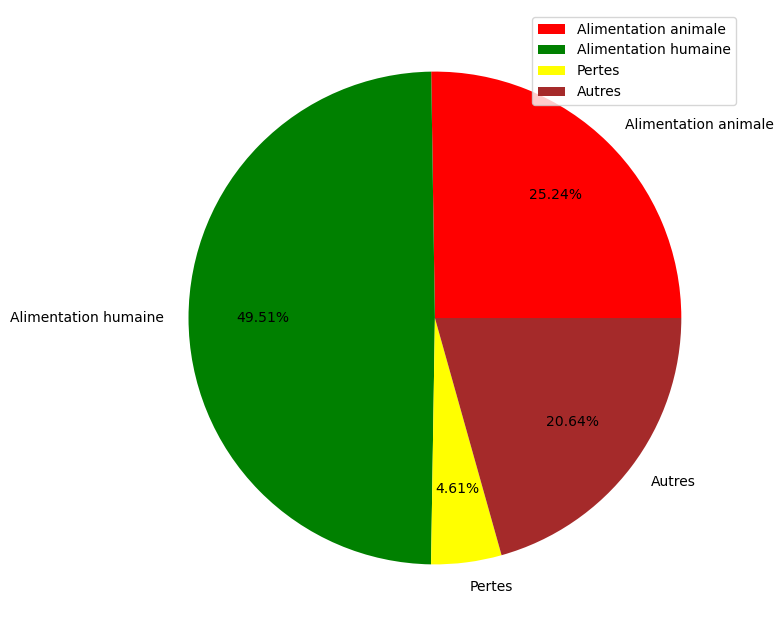

In [43]:
t = 100-(proportion_aliments_animaux_dispo_total + proportion_aliments_humains_dispo_total + proportion_aliments_pertes_dispo_total)
plt.figure(figsize = (8, 8))
x = [proportion_aliments_animaux_dispo_total, proportion_aliments_humains_dispo_total, proportion_aliments_pertes_dispo_total,t]
plt.pie(x, labels = ['Alimentation animale', 'Alimentation humaine', 'Pertes','Autres'],
           colors = ['red', 'green', 'yellow','brown'],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.1)
plt.legend()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [44]:
#Création d'une liste avec toutes les variables

liste = ['Blé','Riz (Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales, Autres']

In [45]:
#Création d'un dataframe avec les informations uniquement pour ces céréales

df_cereales = dispo_alimentaire[dispo_alimentaire['Produit'].isin(liste)]


In [46]:
#Affichage de la proportion d'alimentation animale

Pro_alim_animale = round((df_cereales['Aliments pour animaux'].sum() 
                          * 100 / df_cereales['Disponibilité intérieure'].sum()),2)
print("La proportion est de ",Pro_alim_animale ,"%  des céréales est utilisé pour l'alimentation animale en 2017")

La proportion est de  36.29 %  des céréales est utilisé pour l'alimentation animale en 2017


In [47]:
#Affichage de la proportion d'alimentation humaine 
Pro_alim_humaine = round((df_cereales['Nourriture'].sum() * 100 / df_cereales['Disponibilité intérieure'].sum()),2)

print("La proportion est de",Pro_alim_humaine ,"%  des céréales est utilisé pour l'alimentation humaine en 2017")

La proportion est de 42.75 %  des céréales est utilisé pour l'alimentation humaine en 2017


In [48]:
df_cereales

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1.000000e+06,0.0,1.000000e+06,0.000000e+00,0.0,0.000000e+00,0.0,1000000.0,0.0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000000.0,623.0,63.76,1.36,10.90,4.900000e+07,0.0,4.700000e+07,3.600000e+07,1000000.0,3.000000e+06,0.0,0.0,0.0


In [49]:
df_type_nourriture_humaine = df_cereales.groupby(by='Produit')['Nourriture'].sum().to_frame().sort_values(by='Nourriture', ascending=False)
df_type_nourriture_humaine

,Nourriture
Produit,
Blé,4.578240e+11
Riz (Eq Blanchi),3.772860e+11
Maïs,1.251840e+11
Sorgho,2.415300e+10
Millet,2.304000e+10
Orge,6.794000e+09
Seigle,5.502000e+09
"Céréales, Autres",5.324000e+09
Avoine,3.903000e+09


In [50]:
df_type_nourriture_animal = df_cereales.groupby(by='Produit')['Aliments pour animaux'].sum().to_frame().sort_values(by='Aliments pour animaux', ascending=False)
df_type_nourriture_animal

,Aliments pour animaux
Produit,
Maïs,5.461160e+11
Blé,1.296680e+11
Orge,9.265800e+10
Riz (Eq Blanchi),3.359400e+10
Sorgho,2.480800e+10
"Céréales, Autres",1.903500e+10
Avoine,1.625100e+10
Seigle,8.099000e+09
Millet,3.306000e+09


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [51]:
#Création de la colonne proportion par pays
df_data_personnes_sous_nutri['proportion par pays'] = round((df_data_personnes_sous_nutri['sous_nutrition'] / df_data_personnes_sous_nutri['Population'] * 100),2)

In [52]:
#affichage après trie des 10 pires pays
top10_pays_sous_alimenter = df_data_personnes_sous_nutri.sort_values(by = 'proportion par pays', ascending = False)

top10_pays_sous_alimenter.head(10)

,Zone,Population,sous_nutrition,proportion par pays
526,Haïti,10982366.0,5300000.0,48.26
1090,République populaire démocratique de Corée,25429825.0,12000000.0,47.19
772,Madagascar,25570512.0,10500000.0,41.06
736,Libéria,4702226.0,1800000.0,38.28
718,Lesotho,2091534.0,800000.0,38.25
1300,Tchad,15016753.0,5700000.0,37.96
1120,Rwanda,11980961.0,4200000.0,35.06
874,Mozambique,28649018.0,9400000.0,32.81
1318,Timor-Leste,1243258.0,400000.0,32.17
4,Afghanistan,36296113.0,10500000.0,28.93


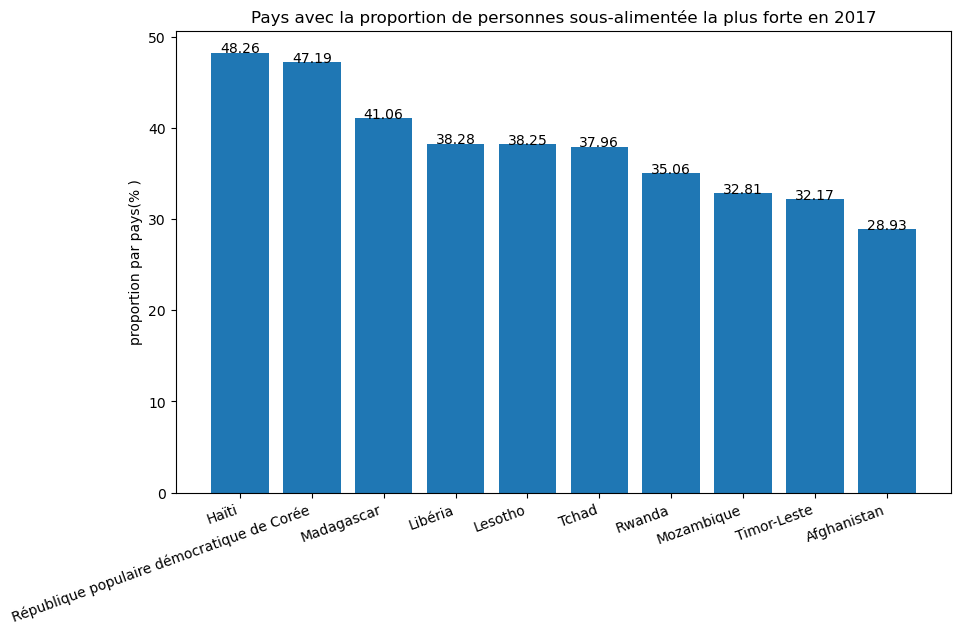

In [53]:
# Méthode pour afficher les valeurs sur les bar du graphique.
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

top10_pays_sous_alimenter_2017 = top10_pays_sous_alimenter.reset_index() 
# recuperer les 10 pays qui ont beneficier le plus d'aide alimentaire depuis 2013

top10_pays_sous_alimenter_2017 = top10_pays_sous_alimenter_2017.iloc[0:10, :]

# variable de type df pour graphique
pro = top10_pays_sous_alimenter_2017.iloc[0:10, 4]

# graphique bar
plt.figure(figsize=(10,6))
plt.bar(height=top10_pays_sous_alimenter_2017['proportion par pays'],x=top10_pays_sous_alimenter_2017['Zone'])
plt.tick_params(axis='x', rotation=20, labelsize = 10)

addlabels(top10_pays_sous_alimenter_2017['Zone'],pro)
plt.xticks(ha='right')
plt.ylabel('proportion par pays(% )')
plt.title("Pays avec la proportion de personnes sous-alimentée la plus forte en 2017")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [54]:
#calcul du total de l'aide alimentaire par pays
df_aide_alimentaire_2013 = aide_alimentaire.loc[aide_alimentaire['Année'] >= 2013]

top10_pays_aide_alimentaire = df_aide_alimentaire_2013.groupby(by='Zone')['Valeur'].sum()

top10_pays_aide_alimentaire = top10_pays_aide_alimentaire.to_frame().sort_values(by = 'Valeur', ascending = False)

top10_pays_aide_alimentaire = top10_pays_aide_alimentaire.rename(columns={"Valeur":"aide_tonne"})

top10_pays_aide_alimentaire['aide_tonne'] = top10_pays_aide_alimentaire['aide_tonne'] / 1000

In [55]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire

top10_pays_aide_alimentaire.head(10)


,aide_tonne
Zone,
République arabe syrienne,1858943.0
Éthiopie,1381294.0
Yémen,1206484.0
Soudan du Sud,695248.0
Soudan,669784.0
Kenya,552836.0
Bangladesh,348188.0
Somalie,292678.0
République démocratique du Congo,288502.0


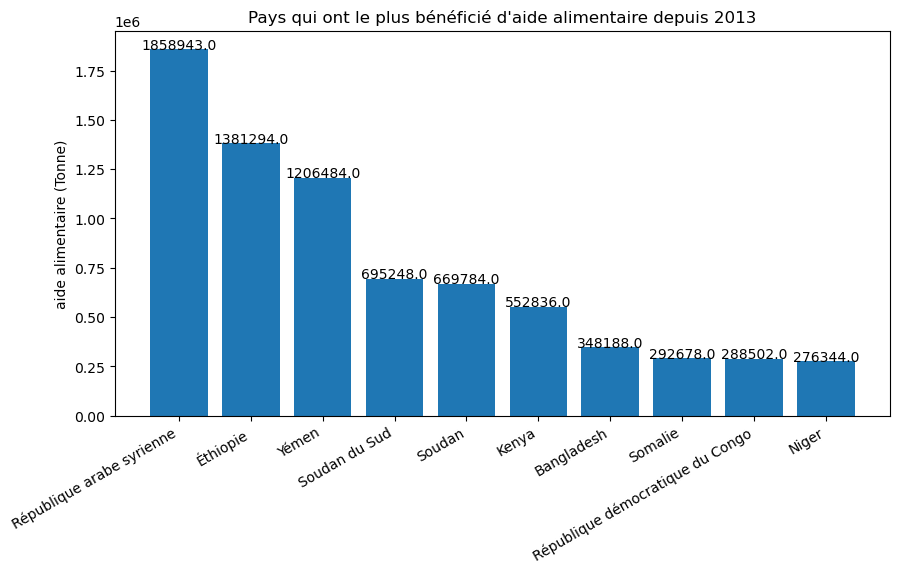

In [56]:
histo = top10_pays_aide_alimentaire.reset_index() 
# recuperer les 10 pays qui ont beneficier le plus d'aide alimentaire depuis 2013
histo = histo.iloc[0:10, :]
tr = histo.iloc[0:10, 1]
plt.figure(figsize=(10,5))
plt.bar(height=histo['aide_tonne'],x=histo['Zone'])
plt.tick_params(axis='x', rotation=30)
addlabels(histo,tr)
plt.xticks(ha='right')
plt.ylabel('aide alimentaire (Tonne)')
plt.title("Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [57]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
df_aide_alimentaire_2013_2016 = aide_alimentaire

# Top des pays qui ont bénéficier d'une aide alimentaire 
df_aide_alimentaire_2013_2016 = df_aide_alimentaire_2013_2016.groupby(by=['Zone','Année']).agg({'Valeur':sum}).reset_index()



In [58]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_pays = ('République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan')

In [59]:
#On filtre sur le dataframe avec notre liste

df_pays_par_annee = df_aide_alimentaire_2013_2016[df_aide_alimentaire_2013_2016['Zone'].isin(liste_pays)]

In [60]:
# Affichage des pays avec l'aide alimentaire par année
df_pays_par_annee = df_pays_par_annee.rename(columns={"Valeur":"aide_kg"})
df_pays_par_annee

,Zone,Année,aide_kg
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [61]:
# taux évolution par pays par années
df_pays_par_annee['Evolution'] = round((df_pays_par_annee.groupby('Zone')['aide_kg'].pct_change()),2)
df_pays_par_annee.fillna(0, inplace = True)
df_pays_par_annee

,Zone,Année,aide_kg,Evolution
157,République arabe syrienne,2013,563566000,0.00
158,République arabe syrienne,2014,651870000,0.16
159,République arabe syrienne,2015,524949000,-0.19
160,République arabe syrienne,2016,118558000,-0.77
189,Soudan,2013,330230000,0.00
190,Soudan,2014,321904000,-0.03
191,Soudan,2015,17650000,-0.95
192,Soudan du Sud,2013,196330000,0.00
193,Soudan du Sud,2014,450610000,1.30
194,Soudan du Sud,2015,48308000,-0.89


In [62]:
df_pays_par_annee.groupby(by='Zone')['Evolution'].sum().sort_values(ascending=False).to_frame()

,Evolution
Zone,
Yémen,2.23
Soudan du Sud,0.41
Éthiopie,-0.66
République arabe syrienne,-0.80
Soudan,-0.98


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [63]:
#Calcul de la disponibilité en kcal par personne par jour par pays

dispo_kcal_jour_pays = df_donnees_pop_dispo_alim.groupby(['Zone']).agg({'Disponibilité alimentaire (Kcal/personne/jour)':sum}).sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending = True)

dispo_kcal_jour_pays.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)': 'Disponibilité alimentaire (Kcal/personne/jour/pays)'}, inplace=True)

dispo_kcal_jour_pays.drop(dispo_kcal_jour_pays[dispo_kcal_jour_pays['Disponibilité alimentaire (Kcal/personne/jour/pays)'] == 0].index, inplace=True)

In [64]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 

affichage_10pays_moins = dispo_kcal_jour_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour/pays)', ascending=True)
affichage_10pays_moins.head(10)

,Disponibilité alimentaire (Kcal/personne/jour/pays)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


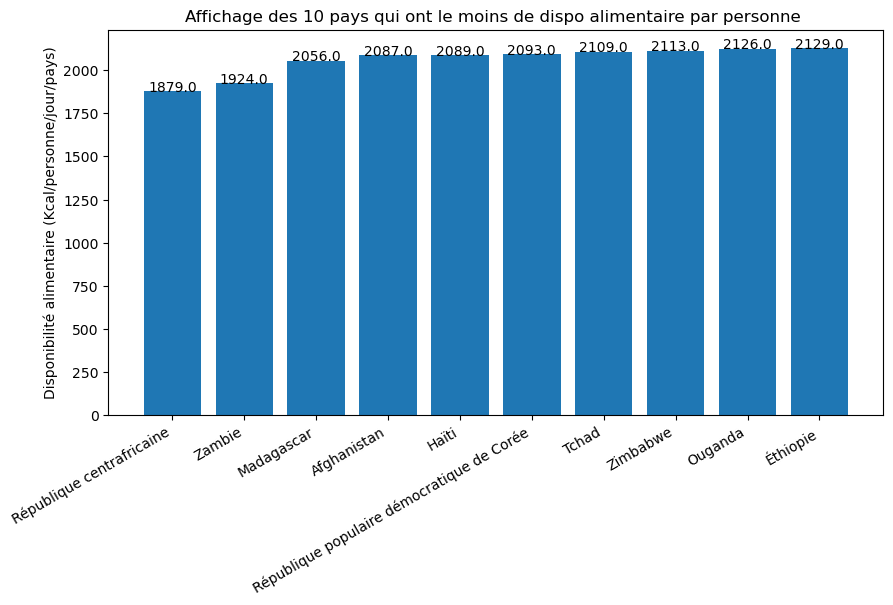

In [65]:
affichage_10pays_moins = affichage_10pays_moins.reset_index()
v10_dim = affichage_10pays_moins.iloc[0:10, :]
val_d = affichage_10pays_moins.iloc[0:10, 1]
plt.figure(figsize=(10,5))
plt.bar(height=v10_dim['Disponibilité alimentaire (Kcal/personne/jour/pays)'],x=v10_dim['Zone'])
plt.tick_params(axis='x', rotation=30)
plt.xticks(ha='right')
addlabels(v10_dim,val_d)
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour/pays)')
plt.title("Affichage des 10 pays qui ont le moins de dispo alimentaire par personne ")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [66]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 

dispo_kcal_jour_pays.iloc[-10:, :]

,Disponibilité alimentaire (Kcal/personne/jour/pays)
Zone,
Allemagne,3503.0
Égypte,3518.0
Luxembourg,3540.0
Italie,3578.0
Irlande,3602.0
Israël,3610.0
États-Unis d'Amérique,3682.0
Turquie,3708.0
Belgique,3737.0


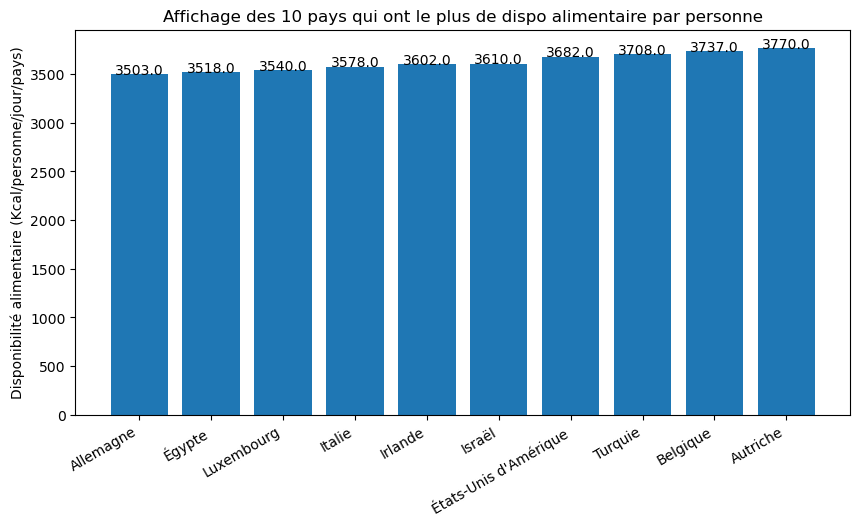

In [67]:

dispo_kcal_jour_pays_plus = dispo_kcal_jour_pays.iloc[-10:, :]
dispo_kcal_jour_pays_plus = dispo_kcal_jour_pays_plus.reset_index()

dispo_kcal_jour_pays_plus = dispo_kcal_jour_pays_plus.sort_values('Disponibilité alimentaire (Kcal/personne/jour/pays)', ascending=True)
affic = dispo_kcal_jour_pays_plus.iloc[:, 1]

plt.figure(figsize=(10,5))
plt.bar(height=dispo_kcal_jour_pays_plus['Disponibilité alimentaire (Kcal/personne/jour/pays)'],x=dispo_kcal_jour_pays_plus['Zone'])
addlabels(dispo_kcal_jour_pays_plus,affic)
plt.tick_params(axis='x', rotation=30)
plt.xticks(ha='right')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour/pays)')
plt.title("Affichage des 10 pays qui ont le plus de dispo alimentaire par personne")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [68]:
#création d'un dataframe avec uniquement la Thaïlande 
population_thailande = df_data_personnes_sous_nutri.loc[df_data_personnes_sous_nutri["Zone"] == 'Thaïlande']

dispo_manioc = dispo_alimentaire.loc[(dispo_alimentaire["Zone"] == "Thaïlande") & (dispo_alimentaire["Produit"] == "Manioc")]
dispo_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [69]:
#Calcul de la sous nutrition en Thaïlande
population_thailande_sous_nutri = df_data_personnes_sous_nutri.loc[df_data_personnes_sous_nutri['Zone']=='Thaïlande']
proportion_personnes_sous_nutri_thailande = population_thailande_sous_nutri['proportion par pays']

nourriture_manioc = round((dispo_manioc['Nourriture'] / dispo_manioc['Production']) * 100, 1 )
print(float(proportion_personnes_sous_nutri_thailande), '% de la population Thailandaise est en sous nutrition')
print(float(nourriture_manioc),'% de la production de manioc en Thaïlande sert de nourriture pour la population')

8.96 % de la population Thailandaise est en sous nutrition
2.9 % de la production de manioc en Thaïlande sert de nourriture pour la population


In [70]:
# Variables intéréssantes
nb_exportation_thai = dispo_manioc['Exportations - Quantité']
nb_manioc_thai = dispo_manioc['Production']

In [71]:
# On calcule la proportion exportée en fonction de la proportion

manioc_export = round((dispo_manioc['Exportations - Quantité'] / dispo_manioc['Production']) * 100, 1 )

print(int(nb_manioc_thai), "kg de manioc produit en Thaïlande")
print(int(nb_exportation_thai), "kg de manioc exporté en Thaïlande")
print(float(manioc_export), "% de la production de manioc du pays est exporté à l'étranger")

30228000000 kg de manioc produit en Thaïlande
25214000000 kg de manioc exporté en Thaïlande
83.4 % de la production de manioc du pays est exporté à l'étranger


In [72]:
dispo_kcal_jour_pays = dispo_kcal_jour_pays.reset_index()
dispo_kcal_jour_pays.loc[dispo_kcal_jour_pays['Zone']=='Thaïlande']

,Zone,Disponibilité alimentaire (Kcal/personne/jour/pays)
81,Thaïlande,2785.0


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [73]:
aide_alimentaire.groupby(aide_alimentaire['Produit'])['Valeur'].sum().sort_values( ascending = False)

Produit
Céréales                    4256884000
Blé et Farin                1781515000
Non-céréales                1261513000
Céréales Secondaires        1166565000
Riz, total                   742418000
Légumineuses Sèches,Tot.     737398000
Mélanges et préparations     425839000
Huiles végétales             344973000
BulgurFarEnt                 140547000
Sucre, total                 101014000
Autres non-céréales           48871000
Lait, total                   12478000
Fruits secs, total             9386000
Poiss&produi                   6397000
Viande Total                     53000
Graisses Com                     50000
Name: Valeur, dtype: int64

In [74]:
# pays qui exportent le plus
dispo_alimentaire.groupby(by='Zone')['Exportations - Quantité'].sum().to_frame().sort_values(by='Exportations - Quantité',ascending= False).head(10)

,Exportations - Quantité
Zone,
États-Unis d'Amérique,1.635240e+11
Brésil,1.265520e+11
France,6.594500e+10
Allemagne,5.743100e+10
Canada,5.477100e+10
Argentine,5.233300e+10
Pays-Bas,5.217900e+10
Thaïlande,5.043000e+10
Australie,4.318400e+10
